In [ ]:
#Assignment on PCA

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [91]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [93]:
# Step 1 — Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [95]:
# Step 2 — Calculate covariance matrix
cov_mat = np.cov(X_std.T)
print("Covariance Matrix:\n", cov_mat)

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [97]:
# Step 3 — Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print("\nEigenvalues:\n", eigen_values)
print("\nEigenvectors:\n", eigen_vectors)


Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [99]:
# Step 4 — Sort eigenvalues and eigenvectors in decreasing order
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_idx]
eigen_vectors = eigen_vectors[:, sorted_idx]
print("\nSorted Eigenvalues:\n", eigen_values)
print("\nSorted Eigenvectors:\n", eigen_vectors)


Sorted Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Sorted Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [101]:
# Largest Eigenvalue and Eigenvector
print("\nLargest Eigenvalue:", eigen_values[0])
print("Corresponding Eigenvector:", eigen_vectors[:, 0])


Largest Eigenvalue: 2.9380850501999936
Corresponding Eigenvector: [ 0.52106591 -0.26934744  0.5804131   0.56485654]


In [103]:
# Step 5 — Explained variance ratio
explained_variance_ratio = eigen_values / np.sum(eigen_values)
print("\nExplained Variance Ratio:\n", explained_variance_ratio)


Explained Variance Ratio:
 [0.72962445 0.22850762 0.03668922 0.00517871]


In [79]:
# Step 6 — Choose first 2 principal components
projection_matrix = eigen_vectors[:, :2]
print("\nProjection Matrix (2 components):\n", projection_matrix)



Projection Matrix (2 components):
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [81]:
# Step 7 — Transform the data
X_pca = X_std.dot(projection_matrix)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
print("\nFirst 5 rows of PCA result:\n", df_pca.head())


First 5 rows of PCA result:
         PC1       PC2
0 -2.264703 -0.480027
1 -2.080961  0.674134
2 -2.364229  0.341908
3 -2.299384  0.597395
4 -2.389842 -0.646835


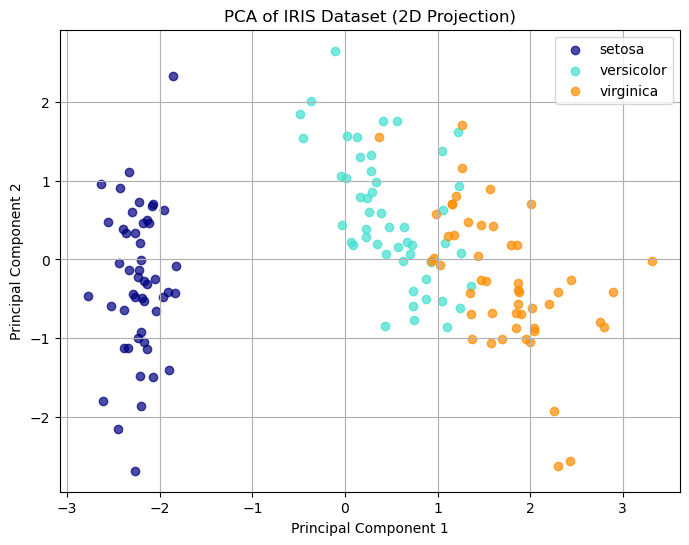

In [107]:
# step 8 Plot the 2D PCA
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                alpha=0.7, color=color, label=target_name)

plt.legend()
plt.title("PCA of IRIS Dataset (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()